# "K means clustering"
> "k means clustering algorithm"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [machine learning]
- search_exclude: true


Clustering is the process of dividing the entire data into groups.

![image](https://user-images.githubusercontent.com/8268939/82712197-59fdd680-9c3c-11ea-8536-7f0251b7161c.png)

# How k means work

[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcblx0QVtTdGFydF0gLS0-IEJbL051bWJlciBvZiBjbHVzdGVycywgay9dXG5cdEIgLS0-IENbY2FsY3VsYXRlIGNlbnRyb2lkXVxuXHRDIC0tPiBEW2NhbGN1bGF0ZSBkaXN0YW5jZXMgdG8gY2VudHJvaWRdXG5cdEQgLS0-IEVbZmE6ZmEtb2JqZWN0LWdyb3VwIEdyb3VwIGJhc2VkIG9uIG1pbiBkaXN0YW5jZV1cbiAgICBFIC0tPiBGe0NvbnZlcmdlbmNlID99XG4gICAgRiAtLT4gfFllc3wgRW5kXG4gICAgRiAtLT4gfE5PfCBDXG5cdFx0XHRcdFx0IiwibWVybWFpZCI6eyJ0aGVtZSI6Im5ldXRyYWwifSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)](https://mermaid-js.github.io/mermaid-live-editor/#/edit/eyJjb2RlIjoiZ3JhcGggVERcblx0QVtTdGFydF0gLS0-IEJbL051bWJlciBvZiBjbHVzdGVycywgay9dXG5cdEIgLS0-IENbY2FsY3VsYXRlIGNlbnRyb2lkXVxuXHRDIC0tPiBEW2NhbGN1bGF0ZSBkaXN0YW5jZXMgdG8gY2VudHJvaWRdXG5cdEQgLS0-IEVbZmE6ZmEtb2JqZWN0LWdyb3VwIEdyb3VwIGJhc2VkIG9uIG1pbiBkaXN0YW5jZV1cbiAgICBFIC0tPiBGe0NvbnZlcmdlbmNlID99XG4gICAgRiAtLT4gfFllc3wgRW5kXG4gICAgRiAtLT4gfE5PfCBDXG5cdFx0XHRcdFx0IiwibWVybWFpZCI6eyJ0aGVtZSI6Im5ldXRyYWwifSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)


# Error Equation for optmization

Assume we have points $X = {x_1, x_2... x_n}$

Clusters $S = {s_1, s_2, ... , s_k}$

where $\mu_i$ is mean of centroid $s_i$

Optimization criteria WCSS (within cluster sum of squares) is ..

$\sum_{i=1}^{k} \sum_{x \in S_{i}}\left\|x_{i-\mu_{i}}\right\|^{2}$

# Complexity 

## Time

Each Round:  O(kN) for N points, k clusters

For i (I) rounds: O(IkN)

For M-dimensional vectors: O(IkMN)

## Space

- To store points and centroids: O((N+K)M)


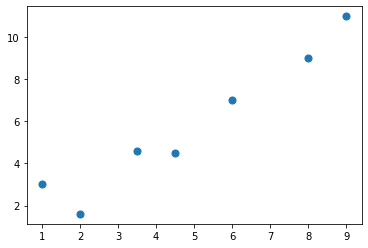

In [91]:
# input dataset
import matplotlib.pyplot as plt

X = np.array([[1,3],[3.5,4.6],
              [4.5,4.5],
              [6,7],
              [8,9],
              [2,1.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=50)

In [0]:
# distance formulae
import numpy as np
import random

def euclidean(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [95]:
k = 2 # num of clusters
m = 1 # max num of iterations



def predict(X):

  samples, features = X.shape

  # initialize centroids
  initial_centroids = np.random.choice(X.shape[0], size=k, replace=False)
  centroids = [X[cent] for cent in initial_centroids]

  print("initial centroids {}".format(centroids))

  # cluster list
  

  for iterations in range(m):

    cluster_list = [[] for _ in range(k)]

    for point in X:
      distances = [euclidean(point, centroid) for centroid in centroids]
      min_centroid_pos = distances.index(min(distances))
      cluster_list[min_centroid_pos].append(point)
    old_centroids = centroids
    centroids = update_centroids(cluster_list)

    if k_means_converged(old_centroids, centroids):
      print("K means done")
      break

    print(cluster_list) 

def update_centroids(cluster_list):
        print(cluster_list)
        # assign mean value of clusters to centroids
        new_centroids = np.zeros((k, features))
        for cluster_idx, cluster in enumerate(cluster_list):
          cluster_mean = np.mean(cluster_list[cluster_idx], axis=0)
          new_centroids[cluster_idx] = cluster_mean
        return new_centroids

def k_means_converged(centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(k)]
        return sum(distances) == 0        

predict(X)

initial centroids [array([3.5, 4.6]), array([ 9., 11.])]
[[array([1., 3.]), array([3.5, 4.6]), array([4.5, 4.5]), array([6., 7.]), array([2. , 1.6])], [array([8., 9.]), array([ 9., 11.])]]
[[array([1., 3.]), array([3.5, 4.6]), array([4.5, 4.5]), array([6., 7.]), array([2. , 1.6])], [array([8., 9.]), array([ 9., 11.])]]
